![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)


#MODULO 2. UNIDAD 1. Encuentro 3

##Análisis exploratorio de datos  (cont)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


##Lectura de datos 

La base de datos 

In [2]:

url="https://drive.google.com/file/d/17HgGADpdQUcuVfjx17Jy85FVWA2sA9cU/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

In [3]:
df1 = pd.read_csv(path, sep=';')

In [4]:
#Visualización de la base de datos
df1.sample(5)

,Empresa,Cant_empleados,Aportes,Satisf,Categ,Ing
1,2,1,15,PS,exp_coy,126
15,16,3,33,MS,No_Exp,278
19,20,4,43,S,Exp_hab,343
0,1,1,12,PS,No_Exp,173
4,5,1,13,MS,exp_coy,165


#Distribuciones bidimensionales. Variables categóricas


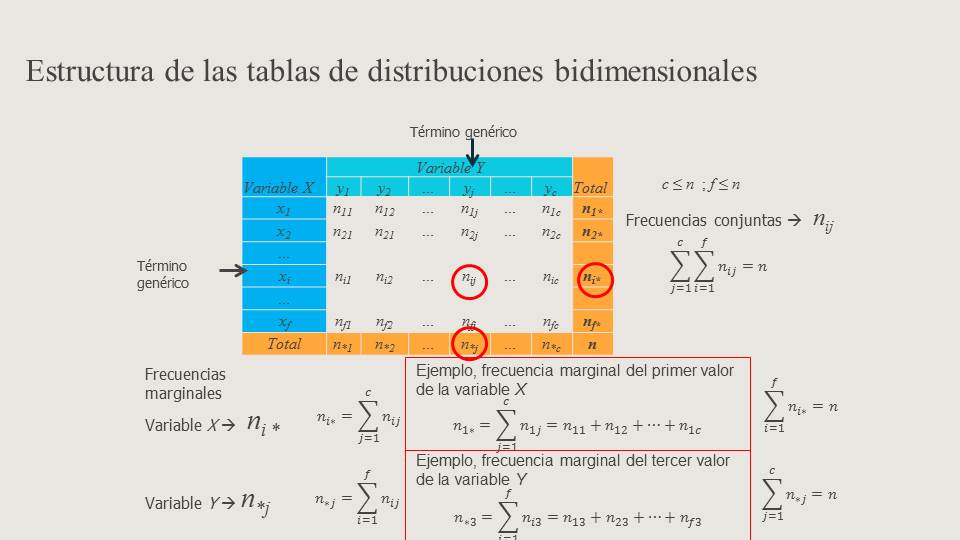

In [5]:
#Tipo de datos 
df1.dtypes

Empresa            int64
Cant_empleados     int64
Aportes            int64
Satisf            object
Categ             object
Ing                int64
dtype: object

In [6]:
df1["Satisf_ord"]= pd.Categorical(df1["Satisf"],categories=["PS","S","MS"])
df1.dtypes

Empresa              int64
Cant_empleados       int64
Aportes              int64
Satisf              object
Categ               object
Ing                  int64
Satisf_ord        category
dtype: object

##Tablas de frecuencias conjuntas y marginales

In [8]:
# Tabla de contingencia Variables Satisf vs Categ
#pd.crosstab(index=df1['Categ'], columns=df1['Satisf'], margins=True)
pd.crosstab(index=df1['Categ'], columns=df1['Satisf_ord'], margins=True)

Satisf_ord,PS,S,MS,All
Categ,,,,
Exp_hab,2,4,2,8
Neta_exp,1,2,0,3
No_Exp,3,0,2,5
exp_coy,1,1,2,4
All,7,7,6,20


In [9]:
# tabla de contingencia frecuencias relativas (base total de observaciones)
pd.crosstab(index=df1['Categ'], columns=df1['Satisf_ord'],
            margins=True).apply(lambda r: r/len(df1) #*100
                                ,axis=1)

Satisf_ord,PS,S,MS,All
Categ,,,,
Exp_hab,0.10,0.20,0.1,0.40
Neta_exp,0.05,0.10,0.0,0.15
No_Exp,0.15,0.00,0.1,0.25
exp_coy,0.05,0.05,0.1,0.20
All,0.35,0.35,0.3,1.00


Variables cuantitativas según categorías de una variable cualitativa con **escala ordinal**, en este caso.

##Tabla de frecuencias relativas totales filas o totales columnas

In [10]:
# tabla de contingencia Tipo de empresa según Nivel de Satisfacc (totales columnas)
pd.crosstab(index=df1['Categ'], columns=df1['Satisf_ord'], 
            ).apply(lambda r: r/r.sum(),
                                axis=1) #Axis=0 Totales columnas

Satisf_ord,PS,S,MS
Categ,,,
Exp_hab,0.250000,0.500000,0.25
Neta_exp,0.333333,0.666667,0.00
No_Exp,0.600000,0.000000,0.40
exp_coy,0.250000,0.250000,0.50


##Gráficos de barras agrupadas

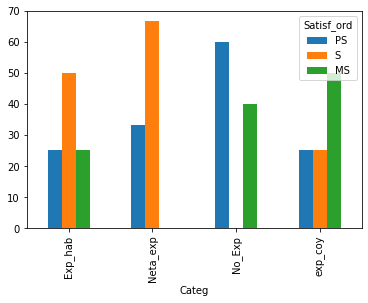

In [11]:
# Gráfico de barras de Satisf segun Categ
plot = pd.crosstab(index=df1['Categ'],
            columns=df1['Satisf_ord']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

##Gráfico de barras apiladas

<function matplotlib.pyplot.legend(*args, **kwargs)>

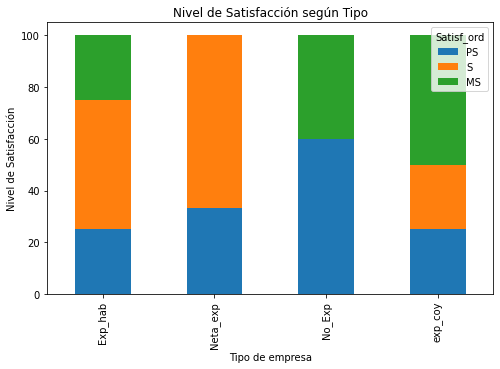

In [12]:
#Gráfico de barras apiladas Satisfacción según Tipo de empresa (observar que lo estamos trabajando como una condicionada)
pd.crosstab(index=df1['Categ'],
            columns=df1['Satisf_ord']
                  ).apply(lambda r: r/r.sum()*100,
                          axis=1).plot(kind='bar', stacked=True,figsize=(8,5))
plt.title("Nivel de Satisfacción según Tipo")
plt.xlabel("Tipo de empresa")
plt.ylabel("Nivel de Satisfacción")
plt.legend



##Distribuciones bidimensionales. Variables numéricas

In [13]:
df1.describe().round()

,Empresa,Cant_empleados,Aportes,Ing
count,20.0,20.0,20.0,20.0
mean,10.0,2.0,22.0,204.0
std,6.0,1.0,14.0,69.0
min,1.0,0.0,0.0,109.0
25%,6.0,1.0,14.0,163.0
50%,10.0,2.0,23.0,184.0
75%,15.0,3.0,33.0,258.0
max,20.0,4.0,43.0,347.0


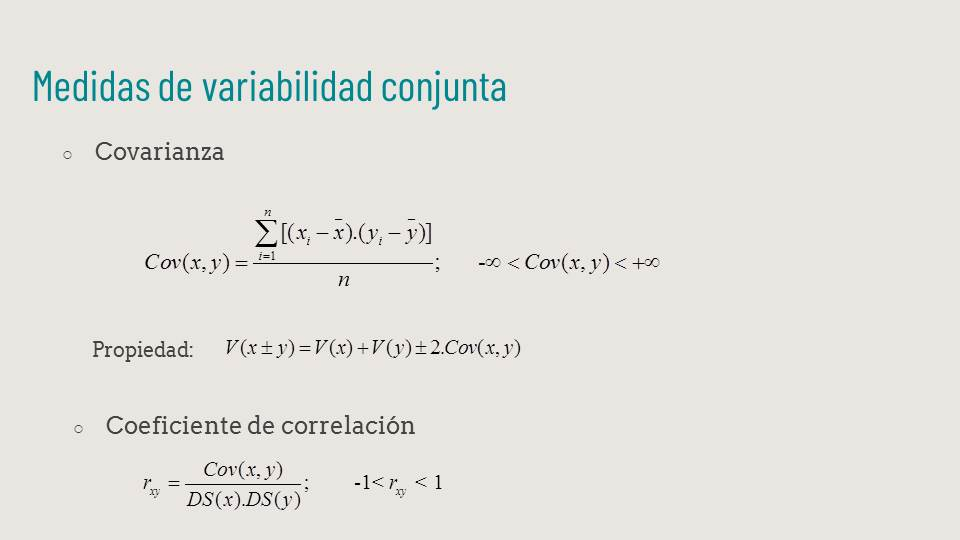

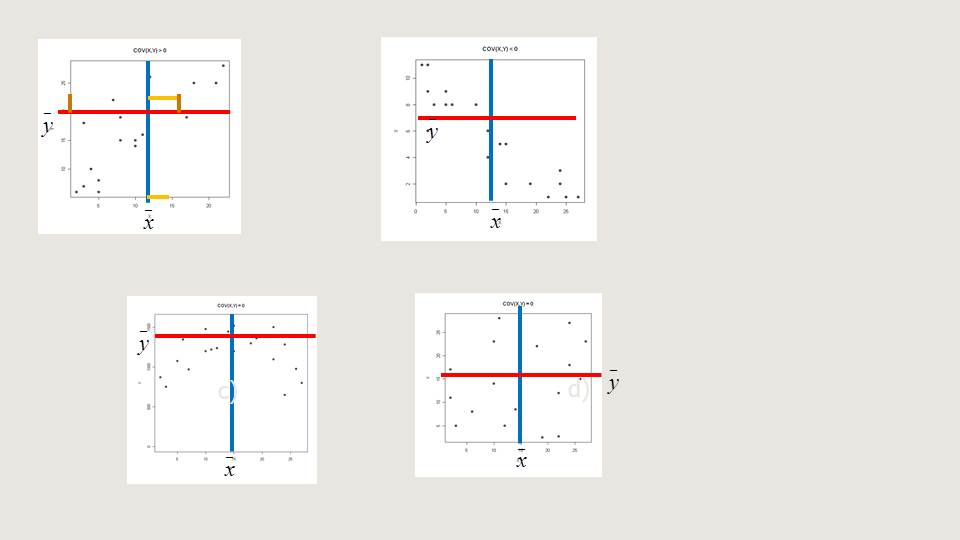

Para visualizar la distribución conjunta de las variables Aportes e Ingresos usamos el "Diagrama de dispersión"

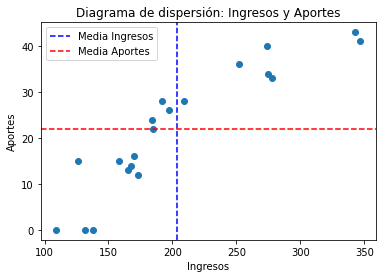

In [14]:
plt.scatter(df1["Ing"], df1["Aportes"])
plt.title("Diagrama de dispersión: Ingresos y Aportes")
plt.axvline(df1["Ing"].mean(), color='blue', linestyle='--', label='Media Ingresos')
plt.axhline(df1["Aportes"].mean(), color='red',linestyle='--', label='Media Aportes')
plt.xlabel("Ingresos")
plt.ylabel("Aportes")
plt.legend()
plt.show()

Por ejemplo para obtener el coeficiente de correlación entre Aportes e Ingresos

In [15]:
#Devuelve los coeficientes de correlación producto-momento de Pearson. Posibles 0<=r<=1
corr_Ap_Ing = np.corrcoef(df1["Aportes"], df1["Ing"])
corr_Ap_Ing

array([[1.        , 0.91460816],
       [0.91460816, 1.        ]])

#PROBABILIDAD

Es la medida de la incertidumbre en procesos aleatorios

##Experimentos aleatorios

*   Cada experimento es una prueba
*   Se realizan en condiciones semejantes
* Cuando el experimento se realiza una grn cantidad de veces, los resultados presentan regularidad estadística 



##Espacio muestral

Conjunto de todos los resultados posibles

$\Omega$={$\omega_i$}             / $i=1,2,..., s$

\#$\Omega= s$

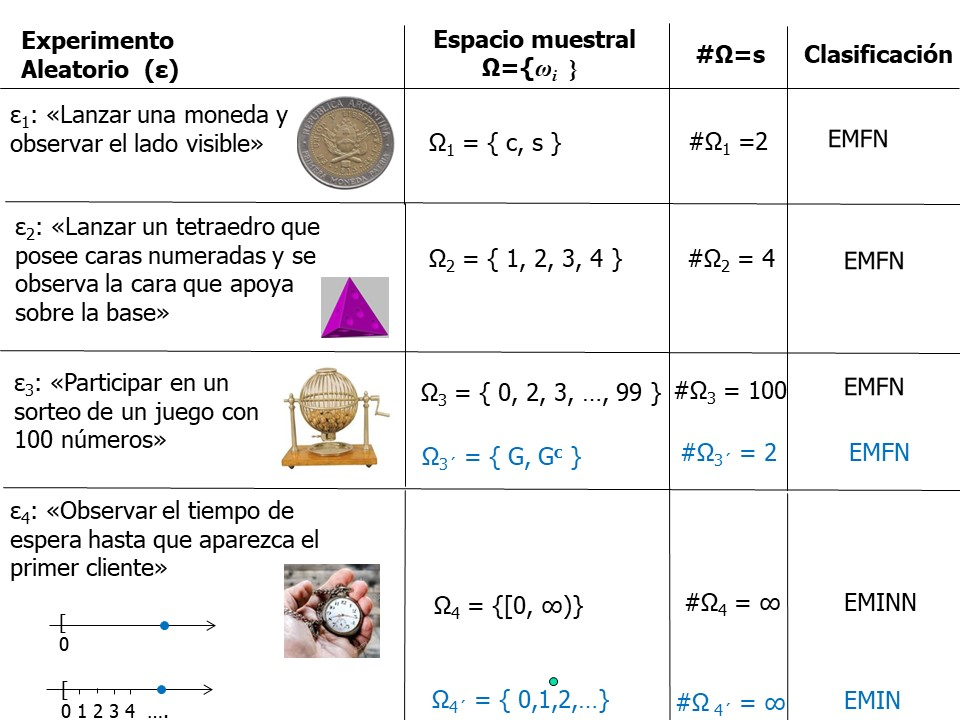

##Algunos otros ejemplos...

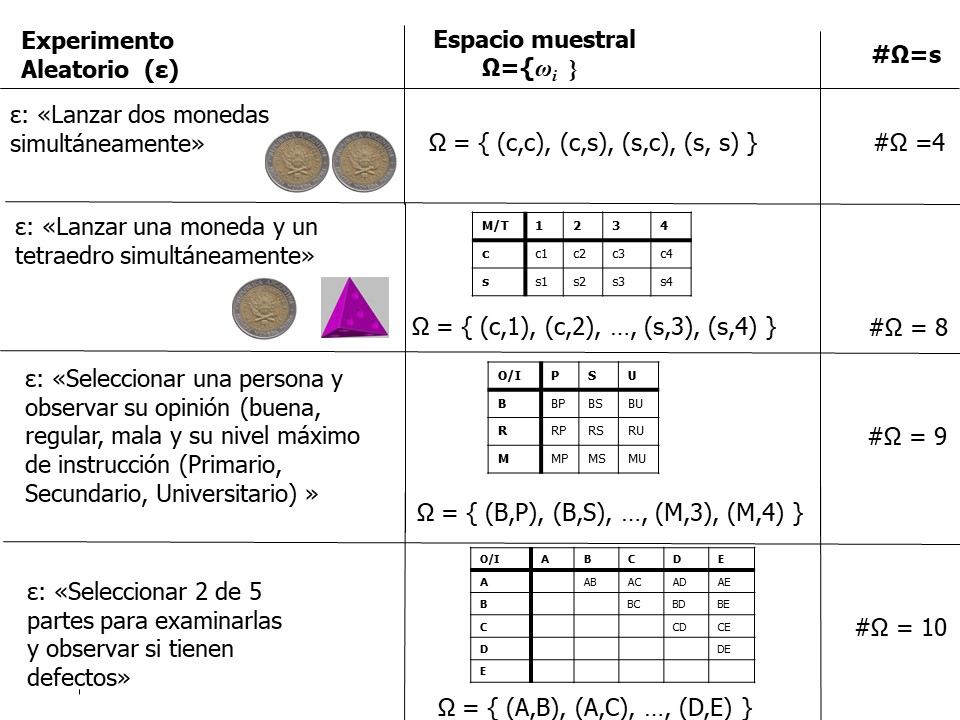

##Eventos

Sea $\epsilon$ un experimento aleatorio cualquiera de $\Omega$ se denomina evento a cualquier subconjunto del espacio muestral

1.   Evento simple o elemental: $(a,b,c,....\omega_i)$
2.   Evento compuesto: $(A,B,C,..., E_i)$



Podemos definir también Ocurrencia y no ocurrencia de un evento

*   $A$
*   $A^c$

Además:

*   $\Omega$: evento cierto
*   $\phi$: evento imposible


Del ejemplo 2: 

1.   $\Omega$={1,2,3,4}
2.   $A$={2,4}="el número ganador es par"
3. $B$={3,4}="el número ganador es mayor o igual a 3"
4. $C$={4}="el número ganador es 4"



##Ocurrencia, eventos disjuntos y algunas opreaciones entre conjuntos

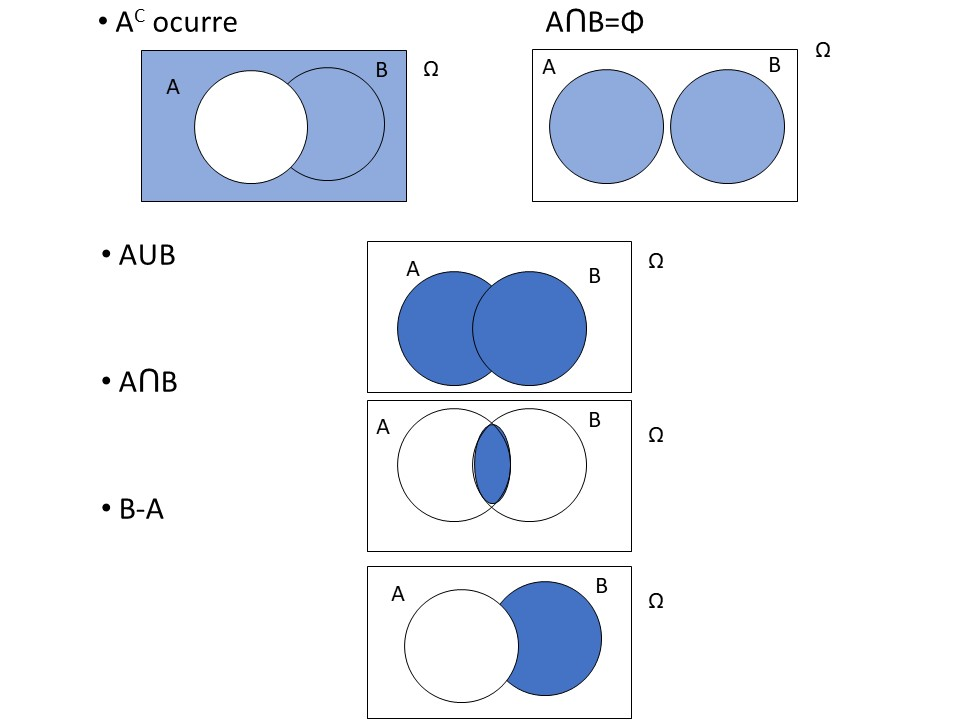

##Colección completa de eventos, algebra de subconjuntos $\mathscr{A}$

##Medida de probabilidad

$P: \mathscr{A} \longrightarrow [0,1]$

Axiomas de Kolmogorov: 

*   $P(A) \geq 0$
*   $P(\Omega)=1$
*   Si $A$ y $B$ son disjuntos, ($A\cap$$B$)= $\phi$ $\longrightarrow$  $P$($A\cup$$B$)= $P(A) + P(B)$





Teoremas de probabilidad

1.   $P(A^c)= 1 -P(A)$
2.   $P(\phi)=0$
3.   $P$($A\cup$$B$)= $P(A) + P(B)- P(A\cap$$B$) 
4.   $P(B-A)=P(B)-   P$($A\cap$$B$)



##Espacio de probabilidad

($\Omega; \mathscr{A}; P $)

##Formas de asignar probabilidades


*   **Enfoque clásico**: todos los resultados de un experimento son igualmente probables

$P(A)=\frac{\mbox{número de resultados posibles del evento A}}{\mbox{número total de resultados posibles}}$


*   **Enfoque frecuencial**: los resultados individuales tienen un comportamiento irregular; sin embargo, los resultados de experimentos que se realizan un gran número de veces presentan una regularidad estadística

$P(A)=\frac{\mbox{número de resultados que se presentó el evento A}}{\mbox{número de pruebas}}=\frac{n_A}{\mbox{n}}$


*   **Enfoque subjetivo**: se asignan probabilidades sobre la base de información previa, creencias, opiniones expertas

Ejemplos extraidos de López Brieva, R. (https://relopezbriega.github.io/)

In [16]:
#Ejemplo lanzamiento de una moneda 10 veces
# cada moneda cara=1 (éxito) seca=0;  p=1/2
resultados = []
for lanzamientos in range(1,10):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

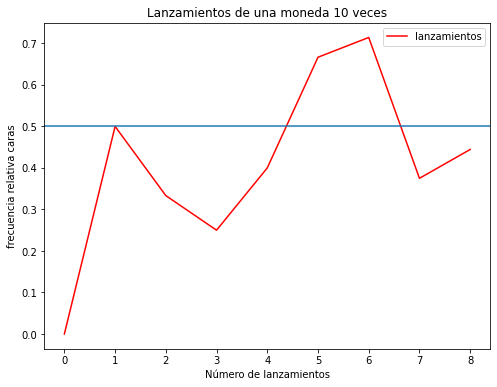

In [17]:
# Gráfico para la salida de cara
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Lanzamientos de una moneda 10 veces',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia relativa caras")
plt.show()

# Qué sucederá: 

*   Si el experimento es el lanzamiento del tetraedro
*   Si el experimento es lanzamiento de dos monedas y se quiere observar la salida de ninguna cara en los dos lanzamientos




In [18]:
# Tetraedro p=1/4 lado=1 resto=0
resultados = []
for lanzamientos in range(1,10):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[3/4, 1/4]) 
    lado1 = lanzamientos.mean()
    resultados.append(lado1)

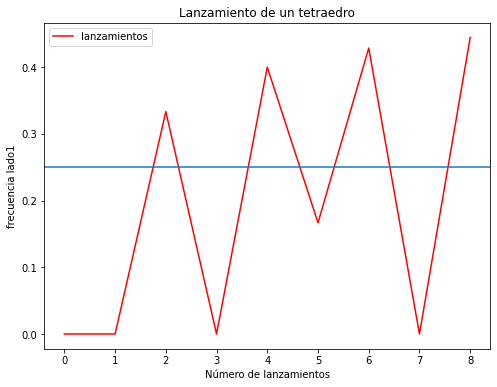

In [19]:
# Gráfico lanzamiento tetredro lado 1
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Lanzamiento de un tetraedro',color='r',figsize=(8, 6))
plt.axhline(1/4)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia lado1")
plt.show()

Ejemplo: 
Vamos a una fiesta a la que concurren un total de 100 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos hace una apuesta. Es decir, que si él acierta gana; o en caso contrario el pierde. Nos hace una apuesta de $1000, ¿la aceptamos?

In [20]:
# Ejemplo La paradoja del cumpleaños
pr = 1.0
invitados = 50

for i in range(invitados):
    pr = pr * (365-i)/365

print("Probabilidad de que coincidan fecha de cumpleaños es {0:.2f}"
      .format(1 - pr))

Probabilidad de que coincidan fecha de cumpleaños es 0.97


**Independencia estadística**: dos eventos son independientes cuando la probabilidad de cada uno de ellos no se ve afectada porque el otro evento ocurra o no. No existe relación estadística entre ellos. 
La probabilidad del lanzamiento de una moneda no se ve afectado por el resultado del lanzamiento anterior.

#Probabilidad condicional y el concepto de independencia

 Sea ($\Omega; \mathscr{A}; P $), dos eventos $A$,  $B$ $\in$ $\mathscr{A}$ con probabilidades $P(A)$ y $ P(B)$ tales que $P(B)> 0$, la probabilidad condicional de $A$ dado $B$ está dada por:

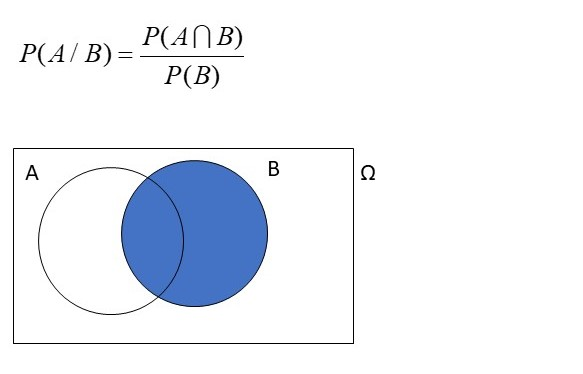

##Leyes generales de probabilidad para múltiples eventos

*   Ley aditiva : $P$($A\cup$$B$)= $P(A) + P(B)- P(A\cap$$B$) 
*   Ley multiplicativa: $P$($A\cap$$B$)= $P(B) .  P(A/B)$ 



In [21]:
#Ejemplo Enfoque frecuencial
# tabla de contingencia frecuencias relativas (base total de observaciones)
pd.crosstab(index=df1['Categ'], columns=df1['Satisf_ord'],
            margins=True).apply(lambda r: r/len(df1) #*100
                                ,axis=1)

Satisf_ord,PS,S,MS,All
Categ,,,,
Exp_hab,0.10,0.20,0.1,0.40
Neta_exp,0.05,0.10,0.0,0.15
No_Exp,0.15,0.00,0.1,0.25
exp_coy,0.05,0.05,0.1,0.20
All,0.35,0.35,0.3,1.00


a) Si selecciona una empresa al azar y esta es netamente exportadora, ¿cuál es la probabilidad que el gerente se encuentre poco satisfecho?

b) son independientes los eventos PS y Neta_exp

*   $PS\cap NE=0,05$
*   $P(NE)=0,15$
*   $P(PS)=0,35$

a) $P(PS/NE)=\frac{(PS\cap NE)}{P(NE)}$

In [22]:
#a) 
p21=0.05
p1j=0.15
p=p21/p1j
print(p)

0.33333333333333337


b) $P(PS\cap NE)=P(PS)* P(NE)$ $\longleftrightarrow PS, NE$ son independientes 

In [23]:
#b
p1j=0.15
pi1=0,35
p=0.15*0.35  #bajo supuesto de independencia
print(p)


0.0525


# VARIABLES ALEATORIAS

Dado ($\Omega; \mathscr{A}; P $)

$X$ es una función real definida sobre el espacio muestral a los reales: 
$X: \Omega \longrightarrow \mathscr{R}$


Es decir, es una función que asigna valores reales a los puntos muestrales que conforman $\Omega$

$X(\omega)=x$

Nota:
 
**Variables aleatorias**: $X, Y, Z$

realizaciones:$x,y,z$ 

**$X$ es una función**

En algunos casos $X(\omega)=\omega=x$

No toda función que se conciba puede ser considerada una variable aleatoria




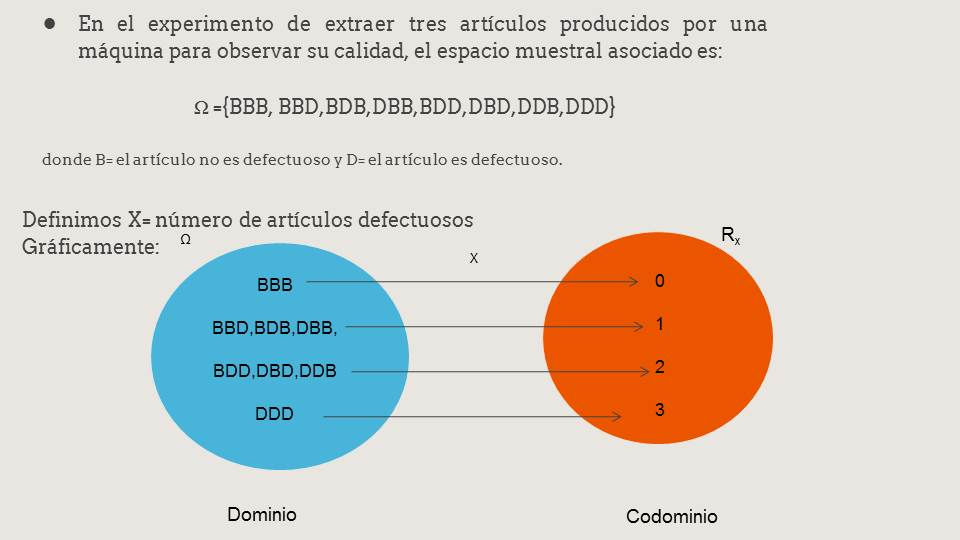

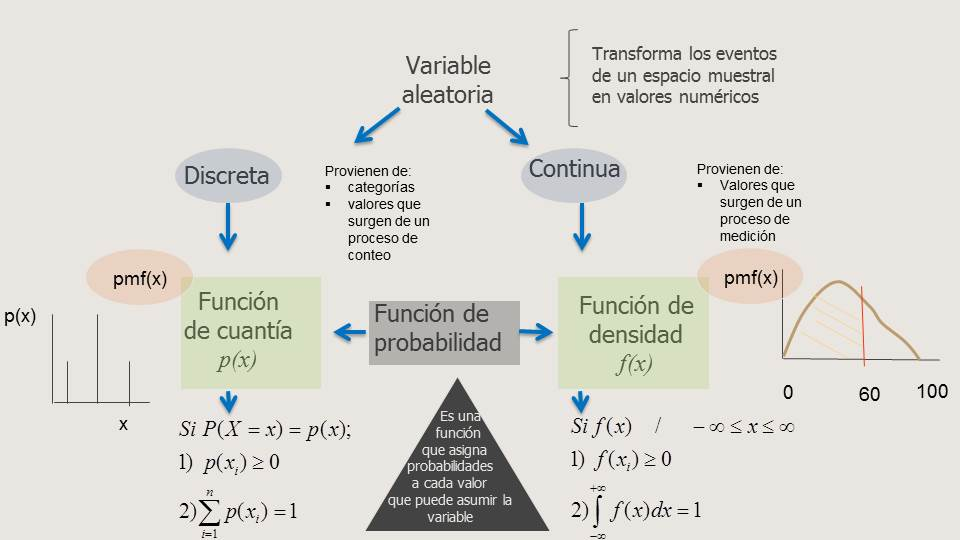

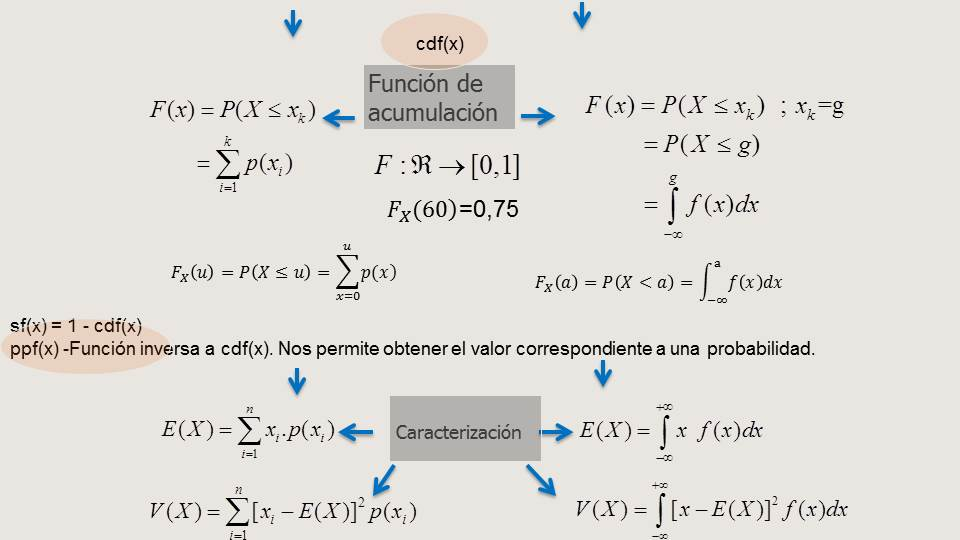

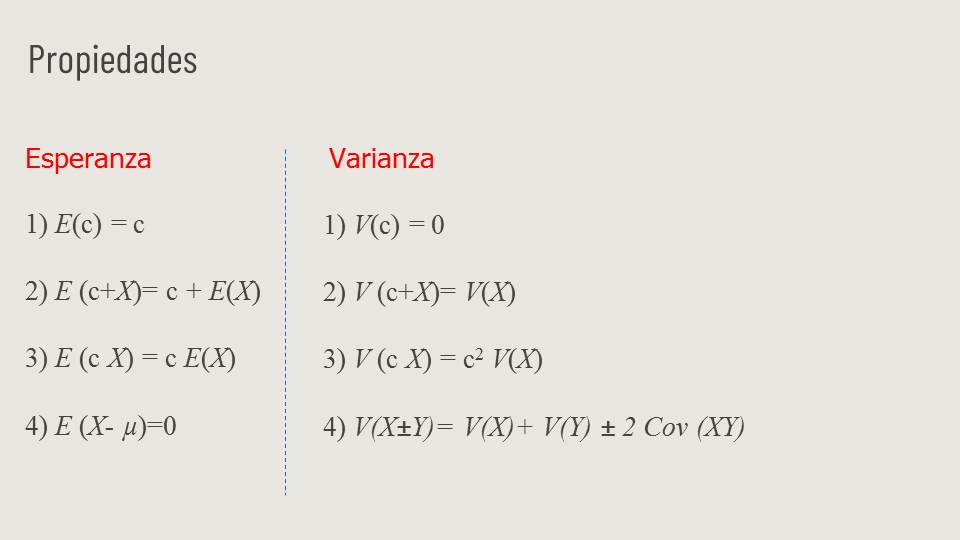

In [24]:
import scipy.stats as ss

cdf(x) - Función de distribución F(X)

sf(x) = 1 - cdf(x)

pmf(x) - Función de probabilidad f(x) (distribuciones discretas)

pdf(x) - Función de densidad f(x) (distribuciones continuas)

ppf(x) - Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

# ALGUNOS MODELOS DE PROBABILIDAD 

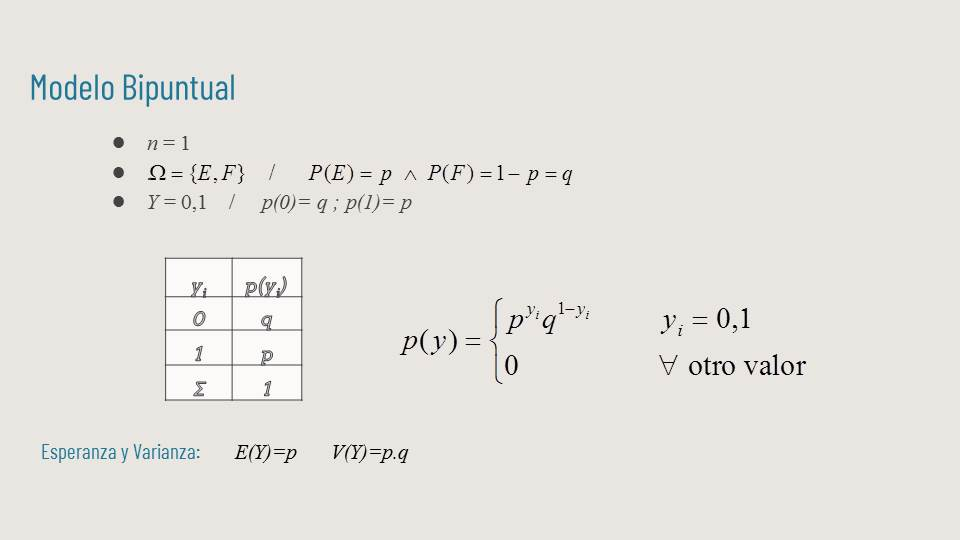

##Modelo binomial

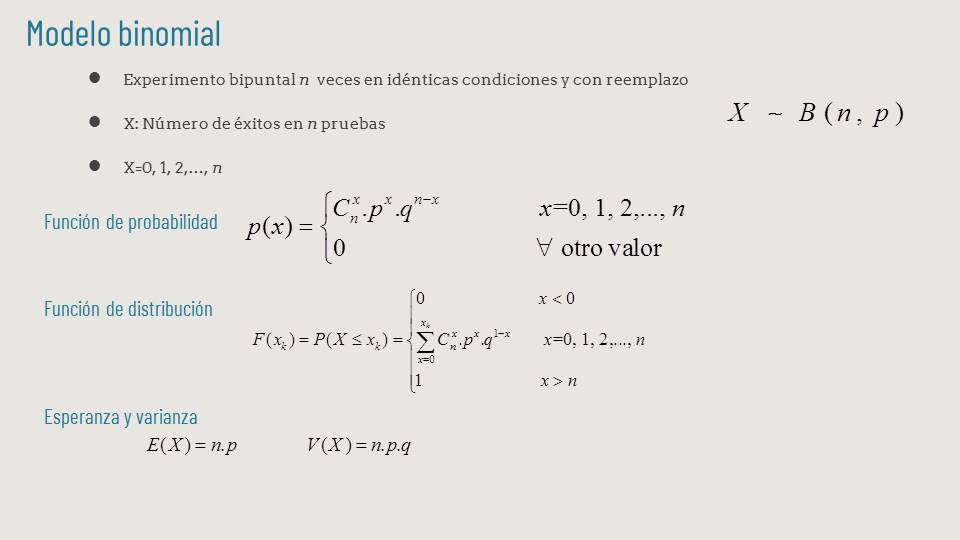

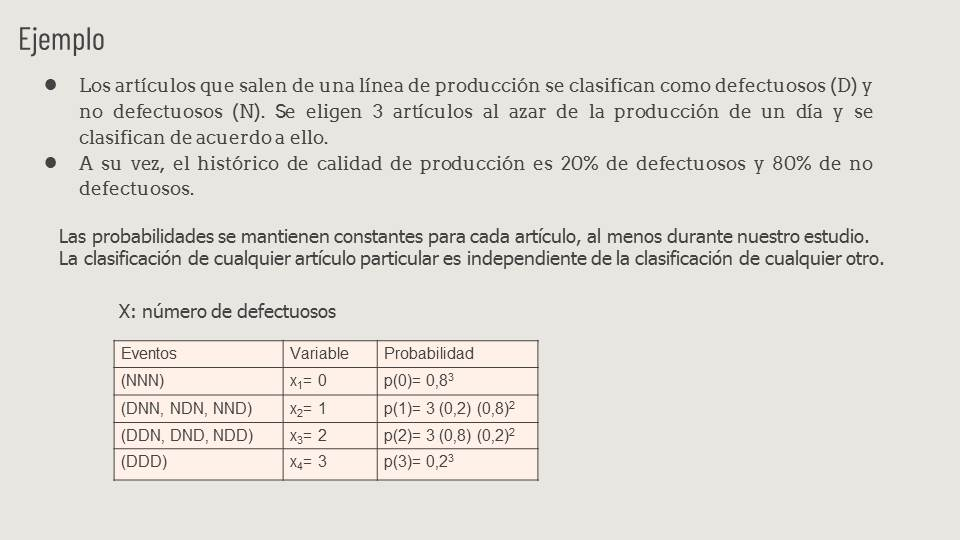

In [25]:
X = ss.binom(3,0.20)  #n y p

In [26]:
#Probabilidad que toquen (X=x) defectuosos
pr = X.pmf(2)
print(pr)

0.09600000000000002


Si tomamos una muestra de 25 y la proporción de defectuosos es del 5%:

In [27]:
X = ss.binom(25,0.05)  #n y p


In [28]:
#Probabilidad que toquen (X=x) defectuosos
pr = X.pmf(4)
print(pr)

0.02692565357840399


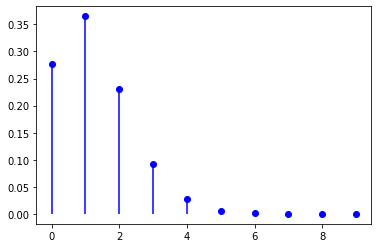

In [29]:
X = ss.binom(25,0.05)
x = np.arange(10)
plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.show()

**Esperanza y varianza** de la binomial

In [30]:
#Esperanza binomial
Ebin=X.mean() 
print(Ebin)

1.25


In [31]:
#Varianza binomial
Vbin=X.var()
print(Vbin)

1.1875


##Modelo Poisson

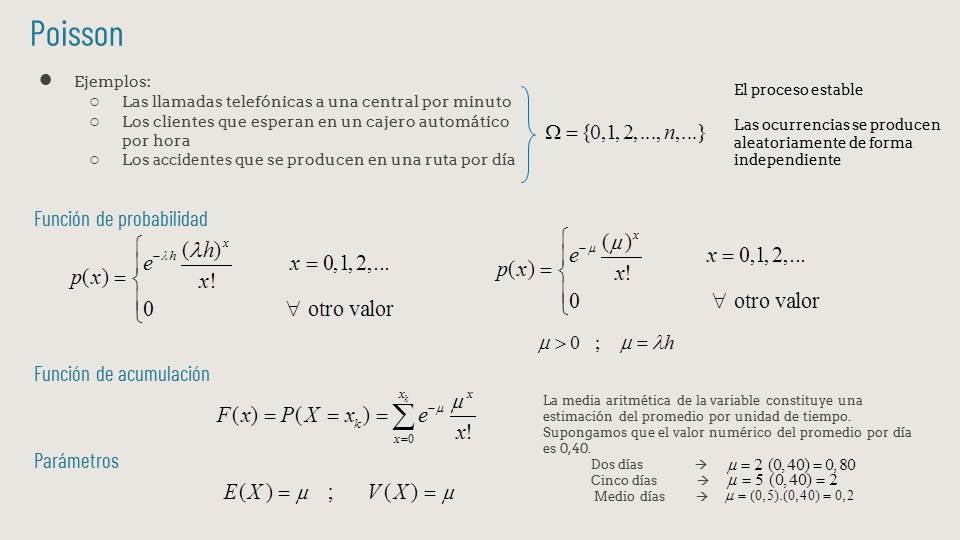

Ejemplo: El promedio de llamadas por día hábil (8 hs) recibidas en un banco es 96. 
a) ¿Cual es la probabilidad de que en media hora se reciban exactamente 14?

In [32]:
lam=96/16
lam

6.0

In [33]:
X = ss.poisson(lam)

In [34]:
pr = X.pmf(14)
print(pr)

0.0022281389053608724


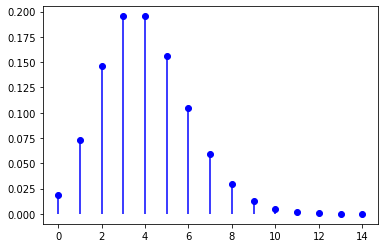

In [35]:
X = ss.poisson(4) #Lambda=1
x = np.arange(15)
plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.show()

In [36]:
#Probabilidad que (X=x) 
pr = X.pmf(3)
print(pr)

0.19536681481316454


## Modelo Exponencial

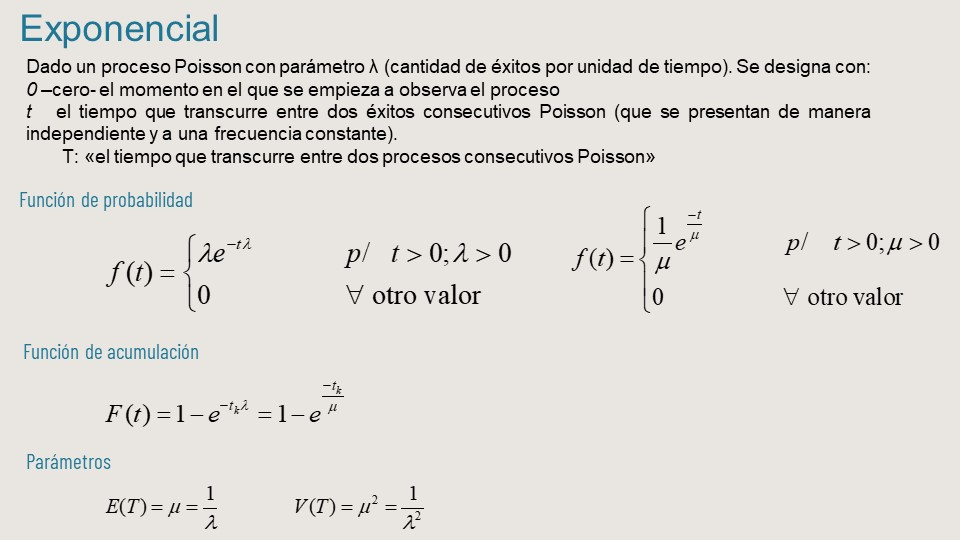

¿cuál es la probabilidad de que no se produzcan accesos en 4 minutos? y ¿cuál esla probabilidad de que el tiempo transcurrido entre dos accesos consecutivos sea inferior a 90 segundos?

In [37]:
ss.expon.sf(4,loc=0,scale=1) # 0.018315638888734179

0.01831563888873418

In [38]:
ss.expon.cdf(1.5,loc=0,scale=1) # 0.77686983985157021

0.7768698398515702

In [39]:
# Graficando Exponencial
from scipy.stats import expon
import matplotlib.pyplot as plt

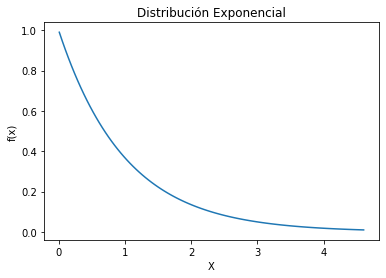

In [40]:
x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x))
plt.title("Distribución Exponencial")
plt.ylabel("f(x)")
plt.xlabel("X")
plt.show()

##Modelo Normal

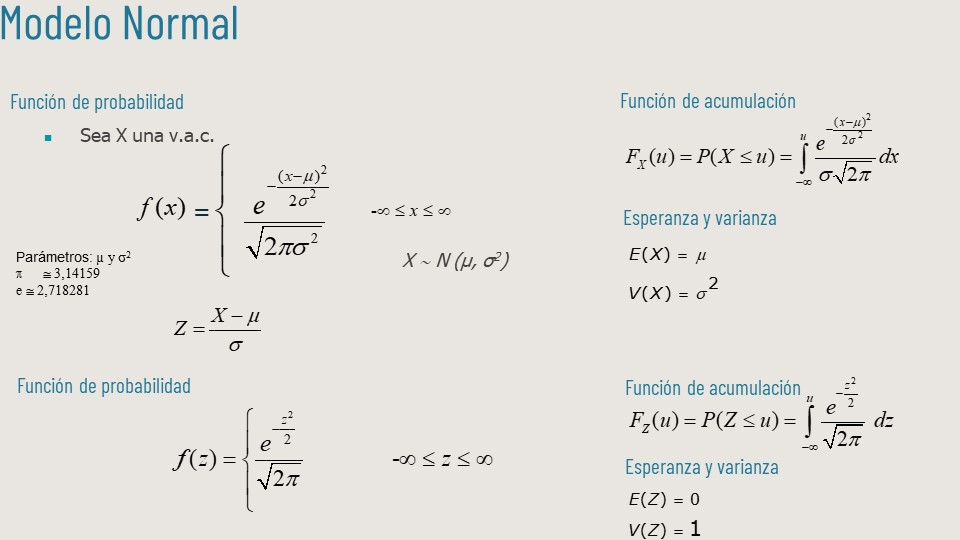

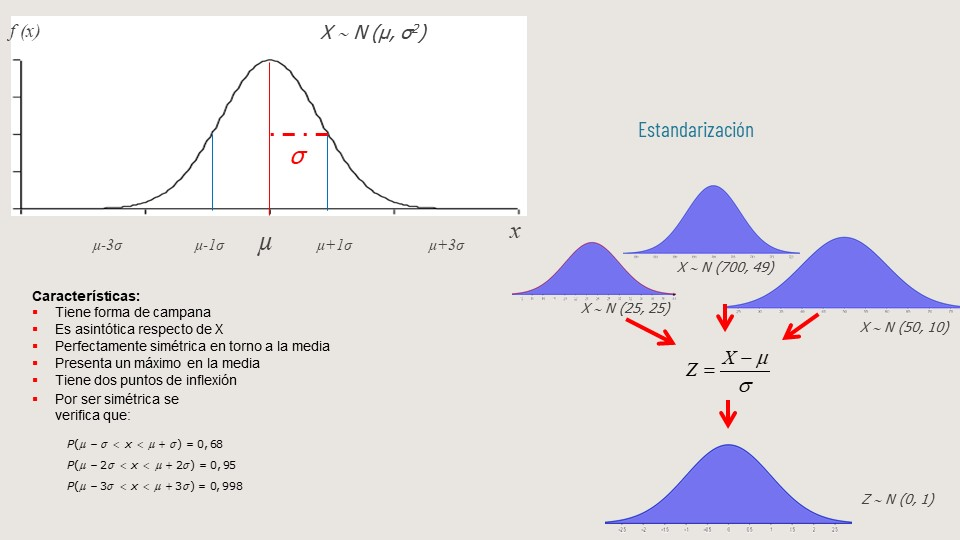

Ejemplo: La duración de un determinado componente electrónico, en horas, es una v.a. que se distribuye según una N(2000,40). ¿Cuál es la probabilidad de que la duración de una de esas componentes sea superior a 1900 horas? ¿y de que esté entre 1850 y 1950 horas?

In [41]:
X = ss.norm(2000,40)
X.sf(1900) 
X.cdf(1950) - X.cdf(1850) 

0.10556135638165455

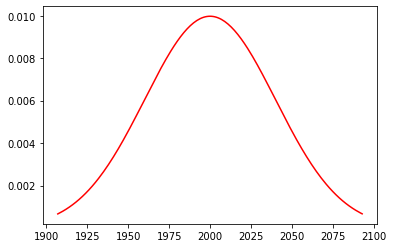

In [42]:
X = ss.norm(2000,40)
x = np.arange(X.ppf(0.01),X.ppf(0.99))

plt.plot(x,X.pdf(x),"r")
plt.show()

#Ley de los grandes números

# DISTRIBUCIONES EN EL MUESTREO

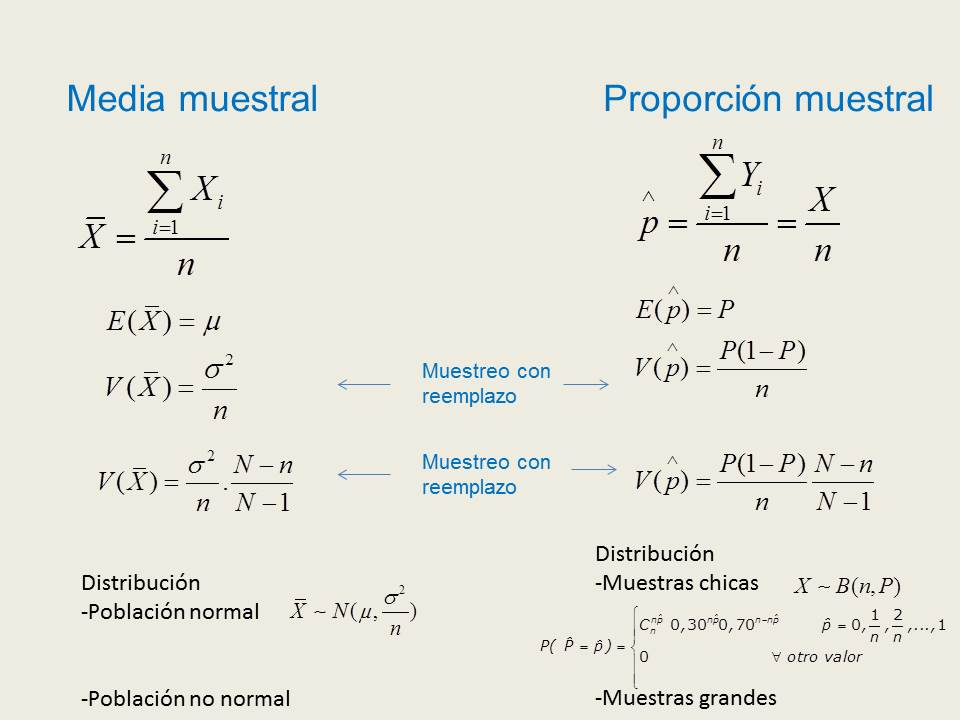

##Teorema Central del Límite

Sea una sucesión $X_1, X_2,..., X_n$ de $v.a.i.i.d$ con cualquier distribución con esperanzas $\mu_1,\mu_2$, ...,$\mu_n$ y varianzas $\sigma_1^2,\sigma_2^2$, ...,$\sigma_n^2$ todas iguales a $\mu$ y a $\sigma^2$, respectivamente. 
Si se toma una muestra lo sufientemente grande y se define una variable suma $Y=\sum_{i=1}^{n} X_i$

$Y \sim^a N(n\mu, n\sigma^2)$ 

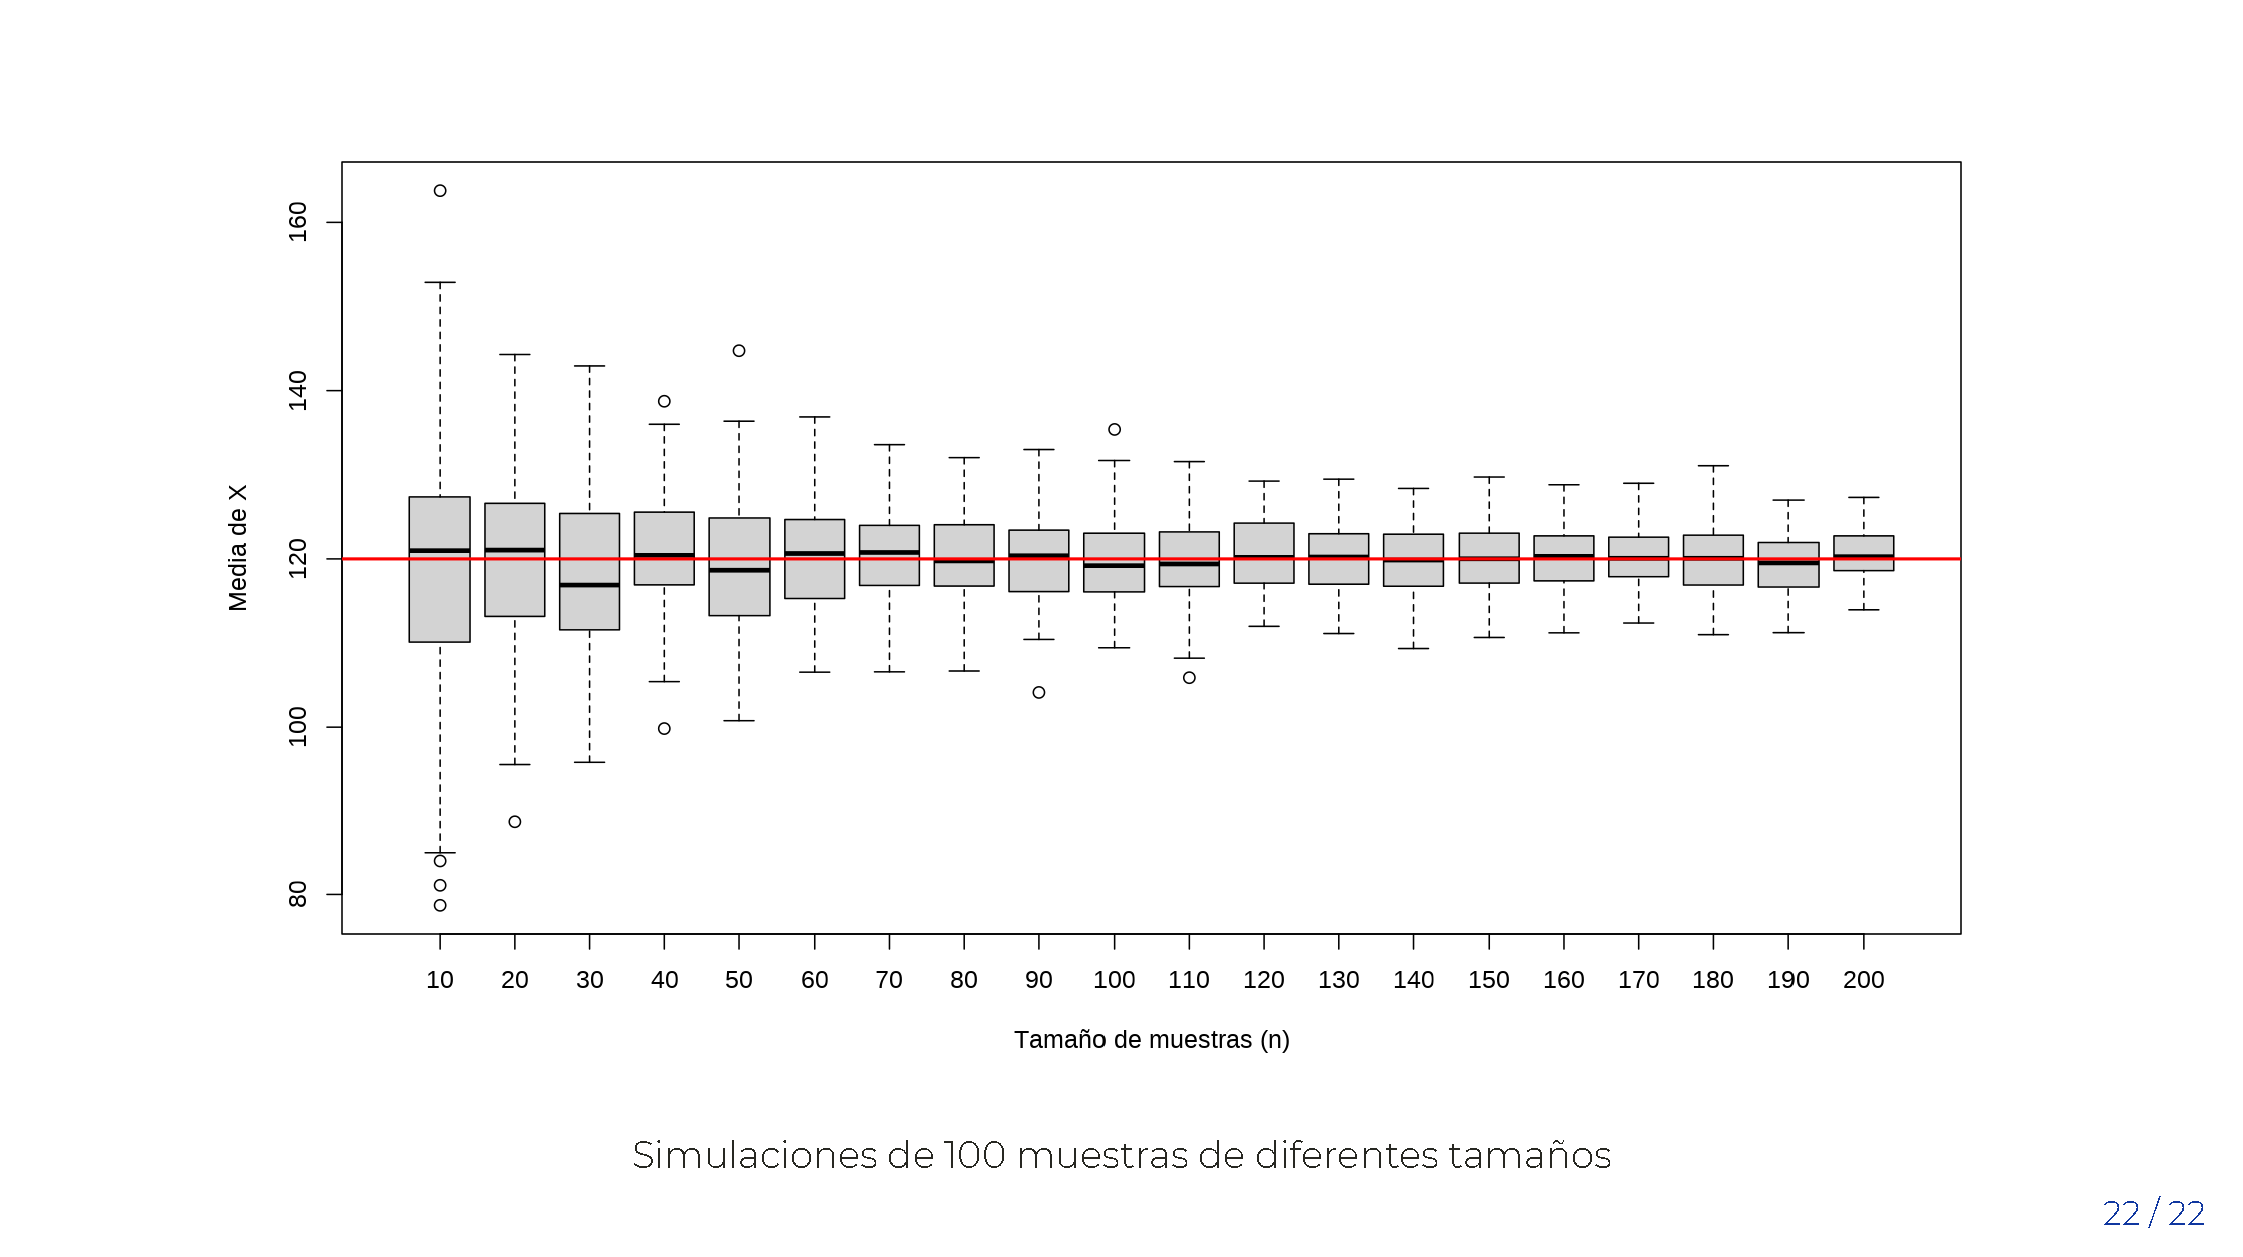

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

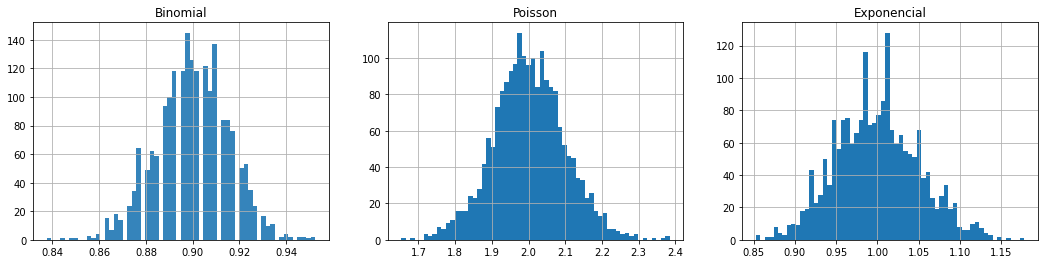

In [44]:
# Ejemplo teorema del límite central
muestra_binomial = []
muestra_exp = []
muestra_poisson = []
p = 0.9
lam = 1.0
c=2000 #cantidad de muestras de tamaño "n"
n=400 #tamaño de muestra
bins=60 #cantidad de intervalos

for i in range(1,c):
    muestra = np.random.binomial(1, p, size=n)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=n)
    muestra_exp.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=n)
    muestra_poisson.append(muestra.mean()) 

df = pd.DataFrame({ 'binomial' : muestra_binomial, 
                     'poisson' : muestra_poisson,
                     'exponencial' : muestra_exp})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
df.binomial.hist(ax=axes[0], alpha=0.9, bins=bins)
df.exponencial.hist(ax=axes[1],bins=bins)
df.poisson.hist(ax=axes[2],bins=bins)

axes[0].set_title('Binomial')
axes[1].set_title('Poisson')
axes[2].set_title('Exponencial')
plt.show()

##Ley débil de los grandes números

*   $P(\left | \hat{\theta}-{\theta} \right |)\leqslant d)$ $\geq$ 1 - $\frac{\sigma_\theta}{n.d^2}$


*   $\lim\limits_{n \to \infty} P(\left | \hat{\theta}-{\theta} \right |)\leqslant d)= 1$


$P(\left | \hat{p}-{P} \right |)\leqslant d)$ $\geq$ 1 - $\frac{PQ}{n.d^2}$

*   $\lim\limits_{n \to \infty} P(\left | \hat{p}-{P} \right |)\leqslant d) = 1$


*   $\lim\limits_{n \to \infty} P(\left | \bar{x}-{\mu} \right |)\leqslant d)= 1$

In [45]:
#Tetraedro p=1/4 lado=1 resto=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[3/4, 1/4]) 
    lado1 = lanzamientos.mean()
    resultados.append(lado1)

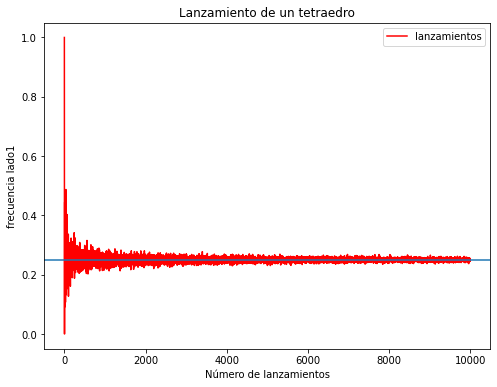

In [46]:
# Gráfico lanzamiento tetredro lado 1
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Lanzamiento de un tetraedro',color='r',figsize=(8, 6))
plt.axhline(1/4)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia lado1")
plt.show()